# Случайный лес и бэггинг

В данном задании мы рассмотрим один из наиболее популярных методов обучения с учителем - случайным лесом, а также с приемами, позволяющими улучшить качество его работы. Работать будем с датасетом digits.

## Импорт используемых модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sklearn
from sklearn import linear_model
from sklearn import ensemble, model_selection, metrics
from sklearn import datasets
from sklearn import tree

## Загружаем датасет и знакомимся с данными

In [2]:
#Загруаем датасет, смотрим на ключи
digits = datasets.load_digits()
digits.keys()

#Выделяем матрицу объекты-признаки и вектор ответов
dig_data = digits.data
dig_target = digits.target

In [3]:
#Просмотрим размерность данных
print('Набор данных содержит {} объектов и {} признаков'.format(dig_data.shape[0], dig_data.shape[1]))

Набор данных содержит 1797 объектов и 64 признаков


In [4]:
#Уникальные метки классов
print(set(dig_target))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [5]:
# Теперь посмотрим, насколько хорошо сбалансированы классы

for tar in set(dig_target):
    print('Набор данных содержит {} объектов класса {}'.format(np.sum(dig_target == tar), tar))

Набор данных содержит 178 объектов класса 0
Набор данных содержит 182 объектов класса 1
Набор данных содержит 177 объектов класса 2
Набор данных содержит 183 объектов класса 3
Набор данных содержит 181 объектов класса 4
Набор данных содержит 182 объектов класса 5
Набор данных содержит 181 объектов класса 6
Набор данных содержит 179 объектов класса 7
Набор данных содержит 174 объектов класса 8
Набор данных содержит 180 объектов класса 9


Как мы видим, классы в датасете хорошо сбалансированы, а это значит, что использовать в дальнейшем accuracy как метрику качества на кросс-валидации вполне целесообразно. Всего имеется 10 классов - по классу на каждую цифру.

## Задача 1. Обычное решающее дерево

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [6]:
%%time

#Создаем дерево и измеряем качество работы по кросс-валидации
dtr = tree.DecisionTreeClassifier()
dtr_score = model_selection.cross_val_score(dtr, dig_data, dig_target, scoring = 'accuracy', cv = 10)

to_write_1 = str(round(dtr_score.mean(), 3))
print('Качество работы решающего дерева по кросс-валидации: {}'.format(to_write_1, 3))

Качество работы решающего дерева по кросс-валидации: 0.825
Wall time: 555 ms


In [7]:
with open ("bagging_and_rf_1.txt", "w") as answer1:
    answer1.write(to_write_1)
answer1.close()

## Задача 2. Решающее дерево с бэггингом

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - ответ в пункте 2.

In [8]:
?ensemble.BaggingClassifier

In [9]:
%%time

#Создаем объект классификатора и получаем качество работы по кросс-валидации
bg = ensemble.BaggingClassifier(n_estimators = 100)
bg_score = model_selection.cross_val_score(bg, dig_data, dig_target, scoring = 'accuracy', cv = 10)

to_write_2 = str(round(bg_score.mean(), 3))
print('Качество работы решающего леса с бэггингом по кросс-валидации: {}'.format(to_write_2, 3))

Качество работы решающего леса с бэггингом по кросс-валидации: 0.919
Wall time: 25.3 s


In [10]:
with open("bagging_and_rf_2.txt", 'w') as answer_3:
    answer_3.write(to_write_2.strip())
answer_3.close()

## Задача 3. Ограничение на число используемых при обучении каждого дерева признаков 

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на d\sqrt{d}d
​  случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [11]:
print('Количество признаков в наборе данных: {}'.format(len(dig_data[0])))
print('Количество признаков, на котором будет обучаться \
каждое дерево из композиции: {}'.format(np.sqrt(len(dig_data[0]))))

Количество признаков в наборе данных: 64
Количество признаков, на котором будет обучаться каждое дерево из композиции: 8.0


Согласно документации, параметр BaggingClassifier, отвечающий за максимальное количество признаков, на котором будет обучаться каждое дерево - это max_features. Зададим его равным корню из общего количества признаков.

In [12]:
%%time

#Выполняем шаги из предыдущих пунктов для BaggingClassifier 
#с ограничением на максимальное количество признаков
bg_with_mf = ensemble.BaggingClassifier(n_estimators = 100, max_features = int(np.sqrt(len(dig_data[0]))))
bg_score_mf = model_selection.cross_val_score(bg_with_mf, dig_data, 
                                              dig_target, scoring = 'accuracy', cv = 10)

to_write_3 = str(round(bg_score_mf.mean(), 3))
print('Качество работы решающего леса с бэггингом и max_features: {}'.format(to_write_3, 3))

Качество работы решающего леса с бэггингом и max_features: 0.931
Wall time: 7.16 s


In [13]:
with open ("bagging_and_rf_3.txt", "w") as answer4:
    answer4.write(to_write_3)
answer1.close()

## Задача 4. Выбор признаков из случайного подмножества при построении каждой вершины

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же d\sqrt{d}d
​ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

Параметр DecisionTreeClassifier, отвечающий за выбор признаков из случайного подмножества при построении каждой вершины также называется max_features.

In [14]:
#Создаем в качестве базового алгоритма DecisionTreeClassifier с параметром max_features
dtr_rf = tree.DecisionTreeClassifier(max_features = 'sqrt')

In [15]:
%%time

#Вновь повторяем создаем классификатор и измеряем качество его работы по кросс-валидации
dtr_rf_b = ensemble.BaggingClassifier(base_estimator = dtr_rf, n_estimators = 100)
dtr_rf_score = model_selection.cross_val_score(dtr_rf_b, dig_data, dig_target, 
                                               scoring = 'accuracy', cv = 10)

to_write_4 = str(round(dtr_rf_score.mean(), 3))
print('Качество работы решающего леса с бэггингом и max_features в параметрах базового алгоритма: {}'.format(to_write_4))

Качество работы решающего леса с бэггингом и max_features в параметрах базового алгоритма: 0.949
Wall time: 7.21 s


In [16]:
with open("bagging_and_rf_4.txt", 'w') as answer_5:
    answer_5.write(to_write_4)
answer_5.close()

## Задача 5. Сравнение baggingClassifier и RandomForestClassifier

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. 

In [17]:
%%time

# Создаем RandomForestClassifier и измеряем качество работы по кросс-валидации
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf_score = round((model_selection.cross_val_score(rf, dig_data, dig_target, cv = 10)).mean(), 3)

print('Качество классификации для RandomForestClasifier: {}'.format(rf_score))

Качество классификации для RandomForestClasifier: 0.951
Wall time: 6.24 s


Как видно, качество работы последней модификации BaggingClassifier почти совпадает с счетом кросс-валидации для RandomForestClassifier

Далее, изучим качество классификации в зависимости от параметров модели.

In [18]:
#создаем интервалы изменения параметров

trees_list = np.arange(10, 310, 10)
trees_score_list = []

features_list = np.arange(4, 68, 4)
feat_score_list = []

depth_list = np.arange(2, 32, 2)
depth_score_list = []

### Количество деревьев в композиции

In [19]:
%%time

#В цикле обучаем модели, на каждом шаге меняя значение количества деревьев в композиции
#После запустим аналогичные циклы, изменяя количество признаков при построении каждой вершины дерева
#и максимальную глубину деревьев соответственно

for trees in trees_list:
    rf_research = ensemble.RandomForestClassifier(n_estimators = trees)
    trees_research_score = round(model_selection.cross_val_score(rf_research, 
                                                dig_data, dig_target, cv = 5).mean(), 3)
    trees_score_list.append(trees_research_score)

Wall time: 2min 8s


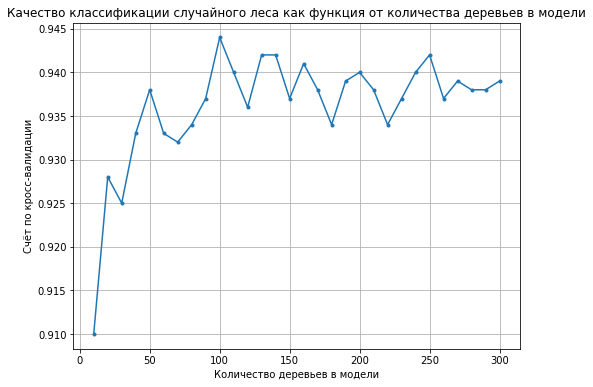

In [20]:
#Построим график зависимости

plt.figure(figsize = (8, 6))
plt.plot(trees_list, trees_score_list, marker = '.')
plt.grid(True)
plt.xlabel('Количество деревьев в модели')
plt.ylabel('Счёт по кросс-валидации')
plt.title('Качество классификации случайного леса как функция от количества деревьев в модели')
#plt.legend()
plt.show()

### Количество признаков при построении каждой вершины дерева

In [21]:
%%time

for features in features_list:
    rf_research = ensemble.RandomForestClassifier(max_features = features)
    features_research_score = round(model_selection.cross_val_score(rf_research, 
                                                dig_data, dig_target, cv = 5).mean(), 3)
    feat_score_list.append(features_research_score)

Wall time: 1min 15s


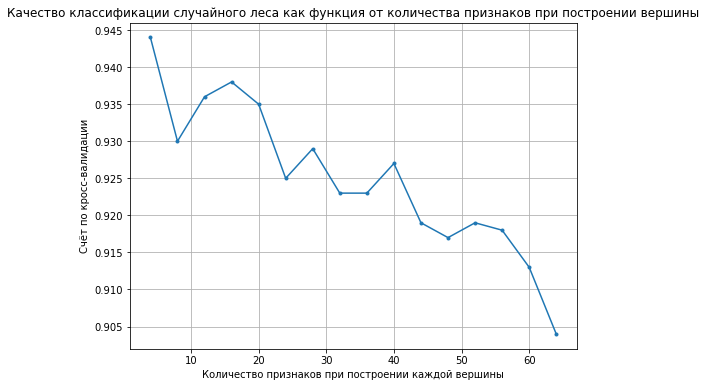

In [22]:
plt.figure(figsize = (8, 6))
plt.plot(features_list, feat_score_list, marker = '.')
plt.grid(True)
plt.xlabel('Количество признаков при построении каждой вершины')
plt.ylabel('Счёт по кросс-валидации')
plt.title('Качество классификации случайного леса как функция от количества признаков при построении вершины')
#plt.legend()
plt.show()

### Максимальная глубина деревьев

In [23]:
%%time

for depth in depth_list:
    rf_research = ensemble.RandomForestClassifier(max_depth = depth)
    depth_research_score = round(model_selection.cross_val_score(rf_research, 
                                                dig_data, dig_target, cv = 5).mean(), 3)
    depth_score_list.append(depth_research_score)

Wall time: 31.9 s


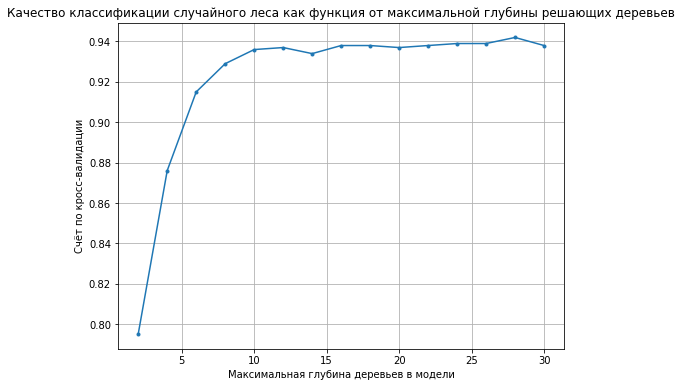

In [24]:
plt.figure(figsize = (8, 6))
plt.plot(depth_list, depth_score_list, marker = '.')
plt.grid(True)
plt.xlabel('Максимальная глубина деревьев в модели')
plt.ylabel('Счёт по кросс-валидации')
plt.title('Качество классификации случайного леса как функция от максимальной глубины решающих деревьев')
#plt.legend()
plt.show()

### Выводы по заданию

Глядя на графики, можно сделать следующие выводы об особенностях работы случайного леса:
1. При маленьком количестве деревьев в композиции, случайный лес работает заметно хуже, чем при большом количестве деревьев, что вполне логично, учитывая, что в данной модели результат классифиикации - это усреднение результатов работы всех базовых алгоритмов. Соответственно, чем больше деревьев в композиции, тем больше шанс, что они будут взаимно исправлять ошибки друг друга. 
2. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. Несмотря на то, что на графике после отметки в 70 деревьев всё ещё наблюдаются пики и спады, в целом качество работы модели находится в интервале 0.94 +- 0,05
3. При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
4. При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).